In [1]:
import keras
from keras.datasets import boston_housing

from keras.models import Sequential
from keras.layers import Dense

from sklearn import preprocessing
from sklearn.preprocessing import scale
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [3]:
x_train_scaled = preprocessing.scale(x_train)

x_train_scaled[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [11]:

x_test_scaled = preprocessing.scale(x_test)
x_test_scaled[0]

array([ 2.8040301 , -0.50784934,  0.96960877, -0.32969024,  1.23174581,
        0.11934137,  1.14739788, -0.91935276,  1.60609286,  1.40778227,
        0.90513041, -4.27829517,  2.51324773])

In [5]:
model = Sequential()
model.add(Dense(128, activation='tanh', input_shape=(13,)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='sgd', metrics=['mse'])


In [6]:
history = model.fit(x_train_scaled, y_train,
 batch_size=128,
epochs=500,
verbose=1,
validation_split = 0.2,
)

Epoch 1/500
3/3 [==============================] - 2s 173ms/step - loss: 571.7375 - mse: 571.7375 - val_loss: 642.5018 - val_mse: 642.5018
Epoch 2/500
3/3 [==============================] - 0s 31ms/step - loss: 509.1329 - mse: 509.1329 - val_loss: 286.8310 - val_mse: 286.8310
Epoch 3/500
3/3 [==============================] - 0s 29ms/step - loss: 183.2679 - mse: 183.2679 - val_loss: 84.6175 - val_mse: 84.6175
Epoch 4/500
3/3 [==============================] - 0s 33ms/step - loss: 62.4967 - mse: 62.4967 - val_loss: 51.5304 - val_mse: 51.5304
Epoch 5/500
3/3 [==============================] - 0s 18ms/step - loss: 43.8988 - mse: 43.8988 - val_loss: 45.4350 - val_mse: 45.4350
Epoch 6/500
3/3 [==============================] - 0s 21ms/step - loss: 38.8229 - mse: 38.8229 - val_loss: 41.7762 - val_mse: 41.7762
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 36.0181 - mse: 36.0181 - val_loss: 41.8874 - val_mse: 41.8874
Epoch 8/500
3/3 [==============================] - 

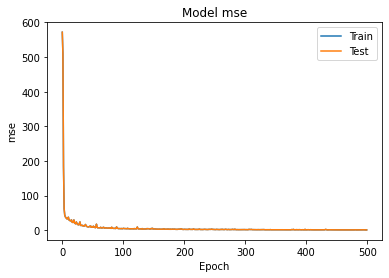

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'])
plt.plot(history.history['mse'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [8]:
score = model.evaluate(x_test_scaled, y_test, verbose=0)
print('Test loss:', score[0])


Test loss: 17.478986740112305


In [9]:

prediction = model.predict(x_test_scaled)
print(prediction.flatten())
print(y_test)


[ 7.7831454 19.426254  21.177637  30.430445  24.93419   23.379414
 34.507988  21.708452  18.687181  19.166584  21.127993  18.095985
 14.652531  43.858063  11.526668  20.75811   25.071959  21.755302
 19.522978  28.94277    9.361995  10.588328  20.01616   16.197405
 19.781866  21.25974   30.108704  24.504416   8.636654  20.215708
 19.787998  13.54915   31.879404  23.989227  19.150023   6.2954693
 18.890493  21.044191  18.501427  30.026466  27.347967  32.093765
 13.6128845 37.576187  33.128494  28.093763  29.717766  19.00964
 19.183004  23.18094   36.952667  19.198378   8.790901  13.971253
 36.737328  28.304356  11.242526  46.8702    33.438675  22.761946
 19.04387   13.62026   12.198535  19.892159  23.033133  21.756613
 13.095646  21.810867  14.955755   6.7338843 27.769085  25.885027
 28.208475  14.61722   25.9063    21.657627  19.440027  25.868027
 35.00641    7.7255077 22.269634  38.17086   17.99179   14.572547
 18.586376  17.445889  12.847477  21.38928   21.815807  21.899141
 18.220612

In [10]:
model.save('House_price.h5')